In [ ]:
import seaborn as sns

In [ ]:
import os

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.applications import densenet

In [ ]:
from tensorflow.keras.models import Sequential, load_model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, MaxPooling2D, Conv2D, Dropout

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [ ]:
import random

In [ ]:
import cv2

In [ ]:
import pickle

In [ ]:
include_top = True

In [ ]:
weights = None

In [ ]:
pooling1 = 'max'

In [ ]:
pooling2 = 'avg'

In [ ]:
classifier_activation = 'softmax'

In [ ]:
learning_rate = 0.001

In [ ]:
epochs = 10

In [ ]:
train_data_path = r'Dataset/train'
test_data_path = r'Dataset/test'

In [ ]:
def count_classes(data_path):
    num_classes = len(os.listdir(data_path))
    return num_classes

In [ ]:
def count_images(data_path):   
    count = 0
    data_path = os.listdir(data_path)
    for folder in data_path:
        count += len(os.listdir(train_data_path + '/' + folder))
    
    return count

In [ ]:
num_classes = count_classes(train_data_path)
print(f"Our data contains {num_classes} classes")
print(f"Our Training data has {count_images(train_data_path)} images")

Our data contains 32 classes
Our Training data has 58801 images


In [ ]:
def main(train_data_path, test_data_path):
    
    for dirs in [train_data_path, test_data_path]:

        filepaths = []
        labels = []
        classes_list = sorted(os.listdir(dirs))

        filepaths,labels = get_fileList(classes_list, dirs, filepaths, labels)
        
        if dirs == train_data_path:
            train_df = obtain_train_df(filepaths, labels)
        else:
            test_df = obtain_test_df(filepaths, labels)
            
    return train_df, test_df

In [ ]:
def get_fileList(classes_list, dirs, filepaths, labels): 
    for s_class in classes_list:
        label = s_class.split('___')[1]
        classpath = os.path.join(dirs, s_class)
        flist = sorted(os.listdir(classpath))
        
        store_image_names_and_its_labels(flist, classpath, filepaths, labels, label)
        
    return filepaths, labels

In [ ]:
def store_image_names_and_its_labels(flist, classpath, filepaths, labels, label):
    
    for file in flist:
        file_path = os.path.join(classpath, file)
        filepaths.append(file_path)
        labels.append(label)

In [ ]:
def obtain_train_df(filepaths, labels):
        
    train_df =pd.DataFrame({
        'image_path' : filepaths,
        'label' : labels
    })
    return train_df

In [ ]:
def obtain_test_df(filepaths, labels):
    
    test_df =pd.DataFrame({
        'image_path' : filepaths,
        'label' : labels
    })
    return test_df

In [ ]:
train_df, test_df = main(train_data_path, test_data_path)

In [ ]:
train_df.head()

,image_path,label
0,Dataset/train\Apple___Apple_scab\00075aa8-d81a...,Apple_scab
1,Dataset/train\Apple___Apple_scab\01a66316-0e98...,Apple_scab
2,Dataset/train\Apple___Apple_scab\01a66316-0e98...,Apple_scab
3,Dataset/train\Apple___Apple_scab\01a66316-0e98...,Apple_scab
4,Dataset/train\Apple___Apple_scab\01a66316-0e98...,Apple_scab


In [ ]:
train_df.shape

(58801, 2)

In [ ]:
test_df.head()

,image_path,label
0,Dataset/test\Apple___Apple_scab\00075aa8-d81a-...,Apple_scab
1,Dataset/test\Apple___Apple_scab\00075aa8-d81a-...,Apple_scab
2,Dataset/test\Apple___Apple_scab\00075aa8-d81a-...,Apple_scab
3,Dataset/test\Apple___Apple_scab\01f3deaa-6143-...,Apple_scab
4,Dataset/test\Apple___Apple_scab\0208f4eb-45a4-...,Apple_scab


In [ ]:
test_df.shape

(14825, 2)

In [ ]:
split_size = 0.2
train_df, val_df=train_test_split(train_df, test_size=split_size, shuffle=True, random_state=123, stratify=train_df['label'])   

In [ ]:
train_df.head()

,image_path,label
52747,Dataset/train\Tomato___Bacterial_spot\7d7eab4f...,Bacterial_spot
18404,Dataset/train\Corn_(maize)___Northern_Leaf_Bli...,Northern_Leaf_Blight
19376,Dataset/train\Corn_(maize)___healthy\6c602efb-...,healthy
25492,Dataset/train\Grape___Leaf_blight_(Isariopsis_...,Leaf_blight_(Isariopsis_Leaf_Spot)
54049,Dataset/train\Tomato___Early_blight\422802e1-c...,Early_blight


In [ ]:
train_df.shape

(47040, 2)

In [ ]:
val_df.head()

,image_path,label
12590,Dataset/train\Cherry_(including_sour)___health...,healthy
27710,Dataset/train\Orange___Haunglongbing_(Citrus_g...,Haunglongbing_(Citrus_greening)
29554,Dataset/train\Orange___Haunglongbing_(Citrus_g...,Haunglongbing_(Citrus_greening)
50078,Dataset/train\Strawberry___Leaf_scorch\f912228...,Leaf_scorch
31268,Dataset/train\Peach___Bacterial_spot\e182422a-...,Bacterial_spot


In [ ]:
val_df.shape

(11761, 2)

In [ ]:
print(f"Our Training data contains {len(train_df)} images")
print(f"Our validation data contains {len(val_df)} images")
print(f"Our Testing data contains {len(test_df)} images")

Our Training data contains 47040 images
Our validation data contains 11761 images
Our Testing data contains 14825 images


In [ ]:
def count_plot(x, title, xlabel, ylabel, width, length, order = None, rotation=False, palette='winter'):
    plt.figure(figsize=(width,length))
    sns.countplot(x = x, palette=palette, order = order)
    plt.title(title, fontsize=25)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.show()

C:\Users\gympr\AppData\Local\Temp\ipykernel_25472\2524442375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = x, palette=palette, order = order)


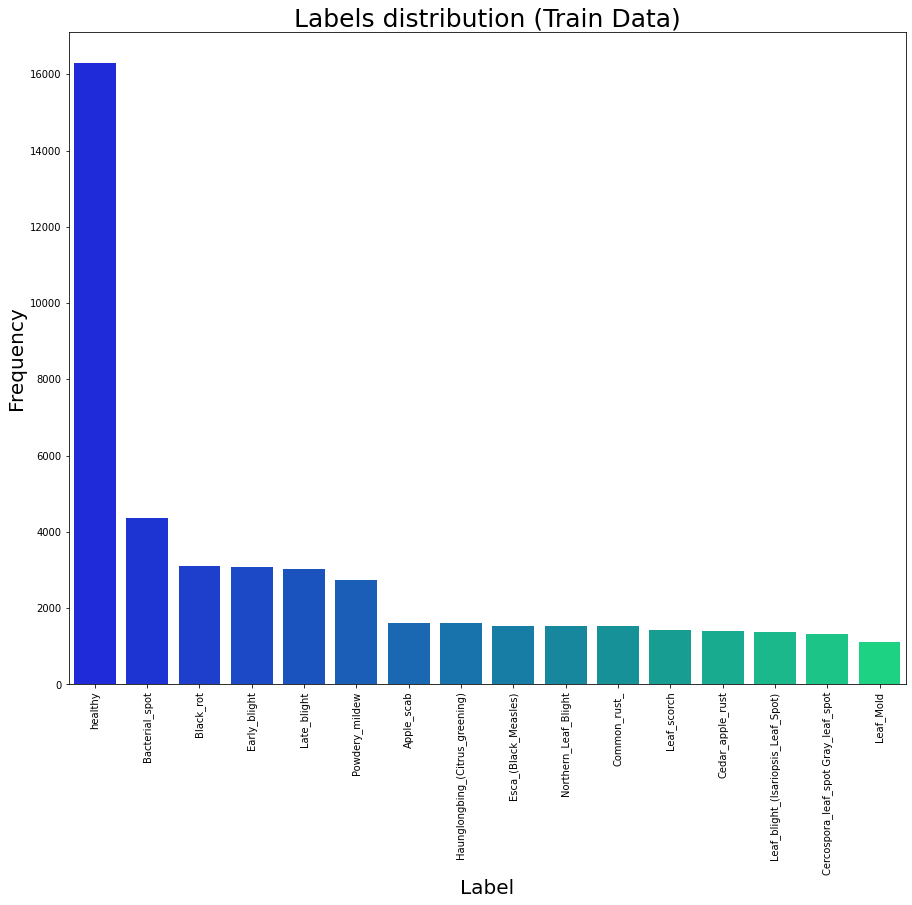

In [ ]:
x = train_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Train Data)", "Label", 'Frequency', 15,12, rotation = True, order=order)

C:\Users\gympr\AppData\Local\Temp\ipykernel_25472\2524442375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = x, palette=palette, order = order)


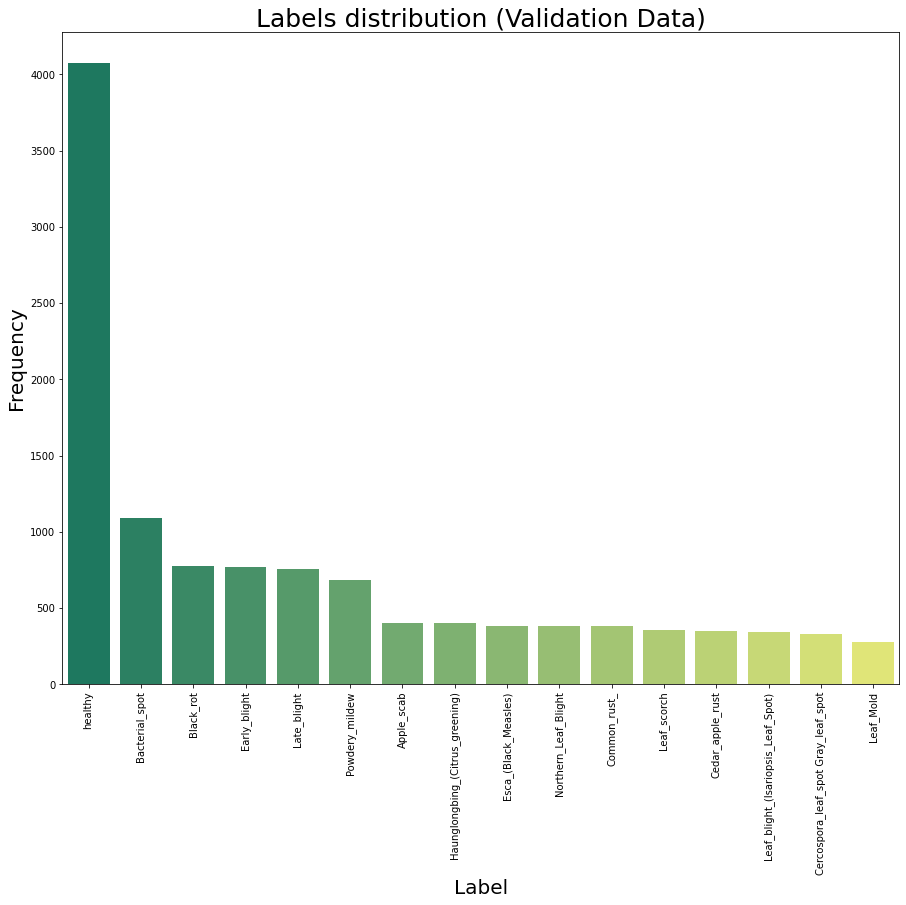

In [ ]:
x = val_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Validation Data)", "Label", 'Frequency', 15,12, rotation = True, order=order, palette='summer')

C:\Users\gympr\AppData\Local\Temp\ipykernel_25472\2524442375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = x, palette=palette, order = order)


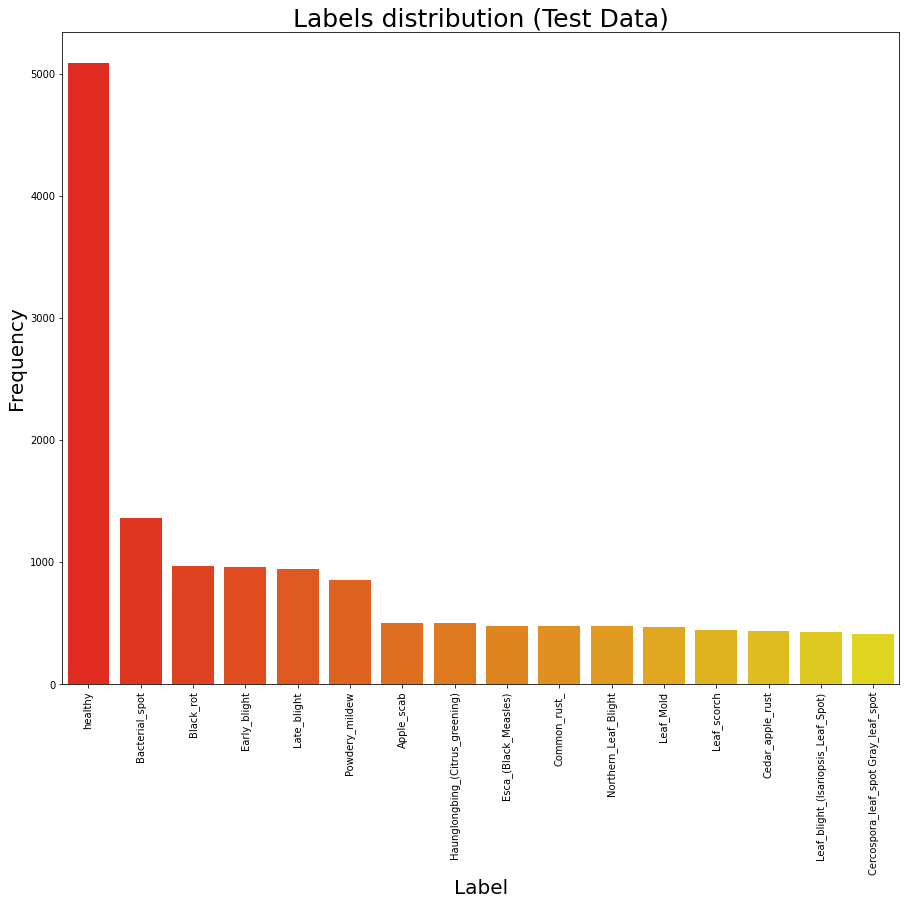

In [ ]:
x = test_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Test Data)", "Label", 'Frequency', 15,12, rotation = True, order=order, palette='autumn')

In [ ]:
def get_images_avg_width_height(df):
    
    avg_width, avg_height = 0,0
    for i in df.index:
        img_path = df['image_path'].loc[i]
        img = cv2.imread(img_path)
        avg_width += img.shape[0]
        avg_height += img.shape[1]

    avg_width // len(train_df)
    avg_height // len(test_df)
    
    return avg_width, avg_height

In [ ]:
avg_width_train, avg_height_train = get_images_avg_width_height(train_df)

In [ ]:
print(f"Average width and height for training data is {avg_width_train//len(train_df)}x{avg_height_train//len(train_df)} with aspect_ratio {avg_width_train/avg_height_train}")

Average width and height for training data is 256x256 with aspect_ratio 1.0


In [ ]:
avg_width_test, avg_height_test = get_images_avg_width_height(test_df)
print(f"Average width and height for testing data is {avg_width_test//len(test_df)}x{avg_height_test//len(test_df)} with aspect_ratio {avg_width_test/avg_height_test}")

Average width and height for testing data is 256x256 with aspect_ratio 1.0


In [ ]:
avg_width_val, avg_height_val = get_images_avg_width_height(val_df)
print(f"Average width and height for validation data is {avg_width_val//len(val_df)}x{avg_height_val//len(val_df)} with aspect_ratio {avg_width_val/avg_height_val}")

Average width and height for validation data is 256x256 with aspect_ratio 1.0


In [ ]:
width, height,depth = 256,256,3
batch_size = 32
class_mode = 'categorical'
scale = True
rescale = None
if scale:
    rescale = 1./255

In [ ]:
train_datagen = ImageDataGenerator(rescale=rescale,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=split_size
                                  )

In [ ]:
test_datagen = ImageDataGenerator(rescale=rescale,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
training_generator=train_datagen.flow_from_directory(train_data_path,
                                               target_size=(width,height),
                                               batch_size=batch_size,
                                               class_mode=class_mode,
                                               subset='training'
                                          )

Found 47055 images belonging to 32 classes.


In [ ]:
validation_generator=train_datagen.flow_from_directory(train_data_path,
                                               target_size=(width,height),
                                               batch_size=batch_size,
                                               class_mode=class_mode,
                                               subset='validation'
                                          )   

Found 11746 images belonging to 32 classes.


In [ ]:
test_generator=test_datagen.flow_from_directory(test_data_path,
                                               target_size=(width,height),
                                               batch_size=batch_size,
                                               class_mode=class_mode)

Found 14825 images belonging to 32 classes.


In [ ]:
denseNet_model = densenet.DenseNet121(include_top=include_top, 
                                      weights=weights, 
                                      input_shape=(width,height,3), 
                                      classes=num_classes,
                                      classifier_activation = classifier_activation,
                                     )

In [ ]:
denseNet_model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
epochs = 2

In [ ]:
denseNet_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 64, 64, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 64, 64, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 64, 64, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 32, 32, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 32, 32, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 32, 32, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 32, 32, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 32, 32, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 32, 32, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 32, 32, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 16, 16, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 16, 16, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 16, 16, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 16, 16, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 16, 16, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 16, 16, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 16, 16, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 16, 16, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 16, 16, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 16, 16, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 16, 16, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 16, 16, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 16, 16, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 16, 16, 1024  0           ['pool4_bn[0][0]']               
          

                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 8, 8, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 8, 8, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 8, 8, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 8, 8, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 8, 8, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 8, 8, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 8, 8, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv5_block13_1_relu[0][0]']   
          

In [ ]:
can_train = False

In [ ]:
if can_train:
    history = denseNet_model.fit(training_generator,
                                               steps_per_epoch=training_generator.samples // batch_size,
                                               epochs = epochs, 
                                               validation_data = validation_generator,
                                               validation_steps=validation_generator.samples // batch_size
                                              )
    denseNet_model.save("Leaf-Disease-Menedely-Densenet-Model.keras")
    with open("Leaf-Disease-Densenet-Menedely-Model-History", "wb") as fs:
        pickle.dump(history.history, fs)
    history = history.history
else:
    denseNet_model= load_model("Leaf-Disease-Menedely-Densenet-Model.keras")
    with open("Leaf-Disease-Menedely-Densenet-Model-History", "rb") as fs:
        history = pickle.load(fs)

In [ ]:
def acc_curve(history):
    
    plt.plot(history['accuracy'], label='train_acc')
    plt.plot(history['val_accuracy'], label='val_acc')
    plt.title('Training and Validation Accuracy', fontsize=20)
    plt.xlabel('Epochs', fontsize = 15)
    plt.ylabel('Accuracy', fontsize = 15)
    plt.legend()
    plt.show()

In [ ]:
def loss_curve(history):
    
    plt.plot(history['loss'], label='train_loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.title('Training and Validation Loss', fontsize=20)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend()
    plt.show()

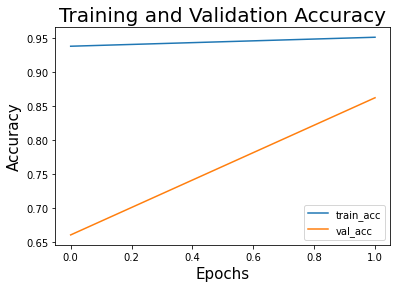

In [ ]:
acc_curve(history)

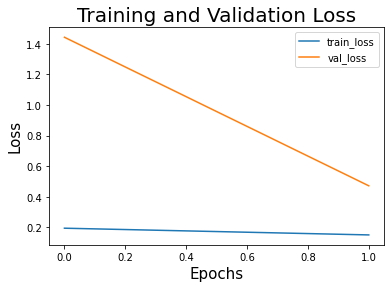

In [ ]:
loss_curve(history)